# Regresión lineal simple

In [1]:
# Importamos bibliotecas y módulos de Python relevantes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


## **Paso 2: Exploración de datos**


Para tener una idea de lo que incluyen los datos, mostramos las primeras 10 filas de los datos.

In [2]:
# Cargamos conjunto de datos
data = pd.read_csv("../data/marketing_sales_data.csv")

# Examinamos las primeras 10 filas del conjunto de datos
data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Observaciones sobre las variables:**

- **TV:** Nivel de inversión (`Low`, `Medium`, `High`); variable categórica ordinal.  
- **Radio:** Presupuesto numérico con alta variabilidad; foco principal del análisis.  
- **Social Media:** Gasto digital numérico; refleja estrategias en redes.  
- **Influencer:** Tipo de influencer (`Nano`, `Micro`, `Macro`, `Mega`); variable categórica nominal.  
- **Sales:** Ventas generadas; variable dependiente continua.  

**Conclusión:**  
Las variables combinan datos categóricos y numéricos, lo que permite analizar cómo los diferentes canales de marketing y tipos de influencer influyen en las ventas.


In [3]:
# Obtenemos el número de filas que contienen valores faltantes.

data.isna().any(axis=1).sum()


np.int64(3)

Se observan 3 filas con valores faltantes

In [4]:
# Para el ejercicio eliminamos las filas que contienen valores faltantes.
data = data.dropna(axis=0)

# Verificamos que las filas con valores faltantes hayan sido eliminadas.
data.isna().any(axis=1).sum()


np.int64(0)

## Análisis de datos exploratorios.

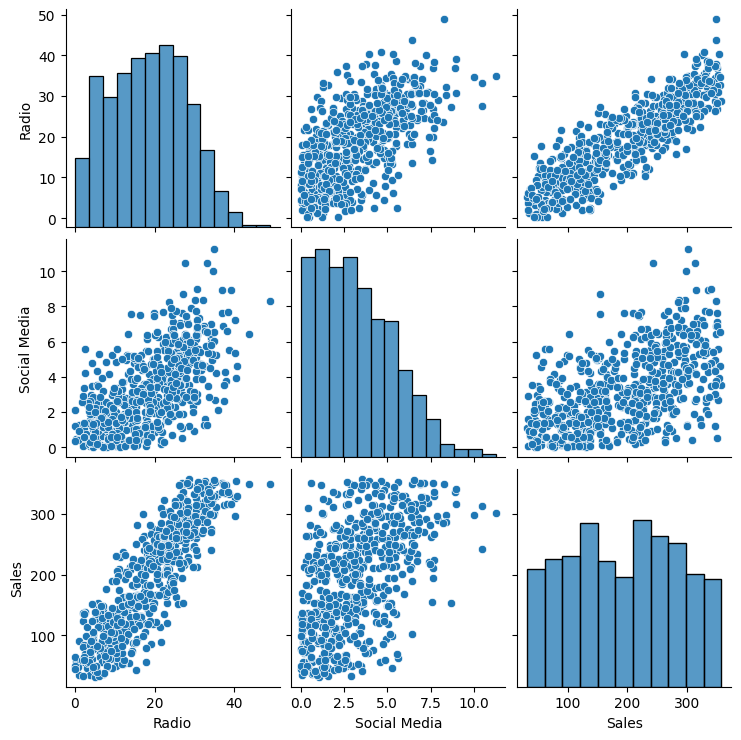

In [5]:
# Creamos diagramas de dispersión por pares de un conjunto de datos
sns.pairplot(data)


En la matriz del diagrama de dispersión, se pueden observar relaciones lineales principalmente entre **Radio** y **Sales**, ya que los puntos muestran una clara tendencia ascendente:  
a mayor inversión en radio, mayores ventas.

En cambio, la relación entre **Social Media** y **Sales** es positiva pero más dispersa, lo que indica una **linealidad moderada**.

**Conclusión:**  
- **Radio ↔ Sales:** relación lineal fuerte.  
- **Social Media ↔ Sales:** relación lineal débil a moderada.

## **Paso 3: Construcción del modelo**

In [6]:
# Datos del modelo de regresión
ols_data = data[['Radio', 'Sales']]

# Definimos fórmula de regresión
ols_formula = 'Sales ~ Radio'

# Importamos función ols y ajustamos el modelo de regresión lineal.
from statsmodels.formula.api import ols
ols_model = ols(formula=ols_formula, data=ols_data).fit()

## **Paso 4: Resultados y evaluación**


In [7]:
# Obtenemos resumen de resultados.
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):          2.07e-176
Time:                        01:10:09   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📊 Descubrimientos del Modelo

El análisis de regresión lineal que evalúa la relación entre el presupuesto de ventas y la inversión en promoción de radio arrojó los siguientes resultados clave:

- Intersección con el eje y: 41.5326
- Pendiente: 8.1733

A partir de estos valores, la ecuación que describe la relación es:

        Ventas = 8.1733 ×Inversión en radio + 41.5326 

🔎 Interpretación de los resultados

- La pendiente de 8.1733 indica que por cada unidad adicional de inversión en radio, las ventas aumentan en promedio 8.17 unidades, manteniendo constantes los demás factores.
- Este comportamiento refleja una relación positiva y significativa entre el presupuesto destinado a radio y las ventas generadas.

## Verificamos los supuestos del modelo.

1. Linealidad
2. Normalidad
3. Observaciones independientes
4. Homocedasticidad

### Linealidad

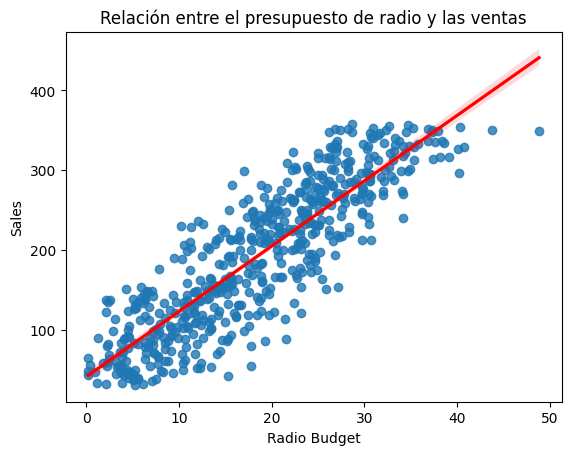

In [8]:
# Visualizamos la línea de regresión ajustada
sns.regplot(x='Radio', y='Sales', data=ols_data, line_kws={"color": "red"})
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.title('Relación entre el presupuesto de radio y las ventas')
plt.show()


- Existe una **fuerte relación lineal positiva** entre el presupuesto de **Radio** y las **Ventas**.  
- A medida que aumenta la inversión en radio, las ventas también aumentan de forma consistente.  
- Los puntos están **alineados cercanos a la línea roja de regresión**, lo que confirma un **ajuste sólido del modelo** y una **alta capacidad explicativa (R² ≈ 0.76)**.

### Normalidad

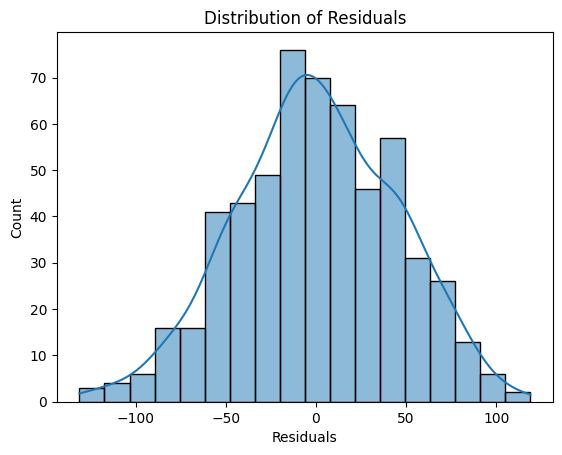

In [9]:
# Calulamos los  residuos del modelo
residuals = ols_model.resid

# Observamos la distribución de los residuos.
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


- Los residuos se distribuyen de forma **aproximadamente normal** alrededor de cero.  
- La curva tiene una forma de campana simétrica, sin sesgos marcados ni valores atípicos extremos.  
- Esto indica que se cumple el **supuesto de normalidad de los errores**, lo que valida la calidad del modelo de regresión.

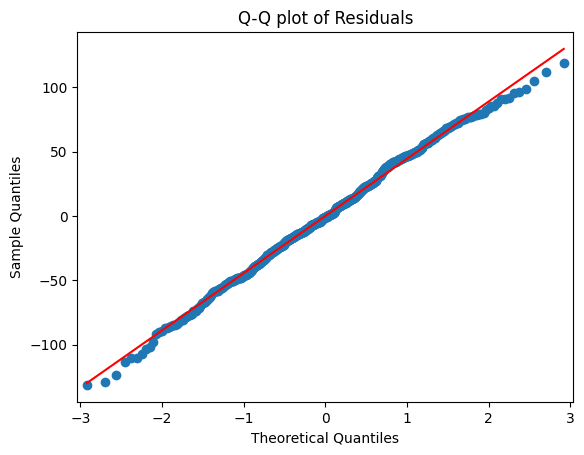

In [10]:
# Confirmamos supuesto de normalidad con un gráfico Q-Q.
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()



- Del gráfico se obseerva que se cumple el supuesto de **normalidad de los residuos**.
- En el gráfico Q-Q, los puntos se alinean aproximadamente sobre la línea roja, lo que indica que los residuos siguen una **distribución normal** sin desviaciones graves.


### Observaciones Independientes y Homocedasticidad

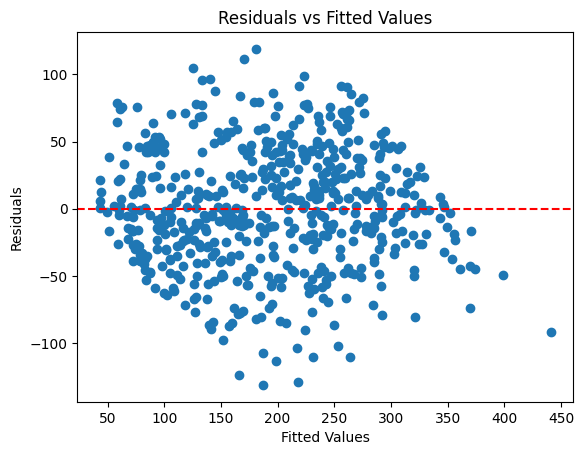

In [11]:
# Obtenemos los valores ajustados.
fitted_values = ols_model.fittedvalues

# Creamos un diagrama de dispersión de residuos frente a valores ajustados.

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()



Ambos supuestos se cumplen razonablemente:

- **Independencia:** Los residuos se distribuyen aleatoriamente alrededor de cero, sin un patrón claro.  
- **Homocedasticidad:** La dispersión de los residuos es relativamente constante a lo largo de los valores ajustados, sin forma de embudo o tendencia creciente.

**Conclusión:**  
El modelo cumple los supuestos de independencia y varianza constante, lo que respalda la validez del análisis de regresión.

## **Consideraciones**
- Existe una **relación lineal fuerte y positiva** entre el presupuesto de **Radio** y las **Ventas**.  
- El modelo de regresión lineal simple explica aproximadamente el **75.7 % de la variabilidad** en las ventas (R² = 0.757).  
- Los **supuestos estadísticos** (linealidad, normalidad, independencia y homocedasticidad) se cumplen adecuadamente.  
- Por cada unidad adicional invertida en radio, las ventas aumentan en promedio **8.17 unidades**, lo que demuestra un **impacto significativo** de este canal publicitario.

## **Resumen Ejecutivo**

> El análisis muestra que la inversión en **publicidad radial** tiene un efecto **positivo, directo y estadísticamente significativo** sobre las ventas.  
> Dado que este canal explica **más del 75 % de la variación en los ingresos**, se recomienda **mantener o incrementar el presupuesto destinado a radio**, priorizándolo frente a otros medios con menor poder predictivo.  
> Esta decisión contribuirá a **optimizar la asignación del presupuesto de marketing** y a **maximizar el retorno de la inversión publicitaria**, enfocando recursos en el canal con mayor impacto probado.
